In [6]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

class App:
    def __init__(self, root):
        self.root = root
        self.root.title("Ejemplo de interfaz adaptable")
        self.root.geometry("900x600")  # tamaño base
        self.root.update()  # actualiza dimensiones

        # Variables
        self.image_left = None
        self.image_right = None
        self.text_input = tk.StringVar()

        # ----- Título -----
        title_label = tk.Label(root, text="Título", font=("Arial", 20, "bold"))
        title_label.pack(pady=10)

        # ----- Marco de imágenes -----
        frame_images = tk.Frame(root)
        frame_images.pack(pady=10)

        # Imagen izquierda
        self.left_label = tk.Label(frame_images, text="Imagen izquierda", bg="lightgray")
        self.left_label.grid(row=0, column=0, padx=10)
        tk.Button(frame_images, text="Subir izquierda", command=self.upload_left).grid(row=1, column=0, pady=5)

        # Imagen derecha
        self.right_label = tk.Label(frame_images, text="Imagen derecha", bg="lightgray")
        self.right_label.grid(row=0, column=1, padx=10)
        tk.Button(frame_images, text="Subir derecha", command=self.upload_right).grid(row=1, column=1, pady=5)

        # ----- Línea de texto -----
        frame_text = tk.Frame(root)
        frame_text.pack(pady=15)

        tk.Label(frame_text, text="Escribe algo: ").pack(side=tk.LEFT)
        tk.Entry(frame_text, textvariable=self.text_input, width=40).pack(side=tk.LEFT, padx=5)

        # ----- Botones de acción -----
        frame_buttons = tk.Frame(root)
        frame_buttons.pack(pady=15)

        tk.Button(frame_buttons, text="Función 1", command=self.funcion1).grid(row=0, column=0, padx=10)
        tk.Button(frame_buttons, text="Función 2", command=self.funcion2).grid(row=0, column=1, padx=10)

        # Botón para mostrar datos
        tk.Button(root, text="Mostrar datos", command=self.show_data).pack(pady=10)

    def upload_left(self):
        self.upload_image("left")

    def upload_right(self):
        self.upload_image("right")

    def upload_image(self, side):
        path = filedialog.askopenfilename(filetypes=[("Imágenes", "*.png;*.jpg;*.jpeg;*.bmp;*.gif")])
        if not path:
            return

        # Calcular tamaño dinámico: 1/3 del ancho de la ventana
        width = int(self.root.winfo_width() / 3)
        height = int(width * 0.75)  # mantiene proporción 4:3

        img = Image.open(path)
        img = img.resize((width, height))
        img_tk = ImageTk.PhotoImage(img)

        if side == "left":
            self.image_left = img_tk
            self.left_label.config(image=self.image_left, text="")
            self.left_label.image = self.image_left
        else:
            self.image_right = img_tk
            self.right_label.config(image=self.image_right, text="")
            self.right_label.image = self.image_right

    def show_data(self):
        print("Texto ingresado:", self.text_input.get())
        print("Imagen izquierda:", "Cargada" if self.image_left else "No cargada")
        print("Imagen derecha:", "Cargada" if self.image_right else "No cargada")

    def funcion1(self):
        print("Función 1 ejecutada")

    def funcion2(self):
        print("Función 2 ejecutada")

# ----- Ejecutar -----
if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()

In [91]:
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk

class App:
    def __init__(self, root):
        self.root = root
        self.root.title("Interfaz con ttk")
        self.root.geometry("900x600")
        self.root.configure(bg="#f8f9fa")

        self.image_left = None
        self.image_right = None
        self.text_input = tk.StringVar()

        # Tema moderno
        style = ttk.Style()
        style.theme_use("clam")
        style.configure("TButton", font=("Segoe UI", 10), padding=6)
        style.configure("TLabel", background="#f8f9fa", font=("Segoe UI", 11))

        # ----- Título -----
        title_label = ttk.Label(root, text="Título", font=("Segoe UI", 20, "bold"), foreground="#212529")
        title_label.pack(pady=15)

        # ----- Imágenes -----
        frame_images = ttk.Frame(root)
        frame_images.pack(pady=15)

        self.left_label = ttk.Label(frame_images, text="Imagen izquierda", background="#dee2e6", anchor="center")
        self.left_label.grid(row=0, column=0, padx=10, ipadx=20, ipady=20)
        ttk.Button(frame_images, text="Subir izquierda", command=self.upload_left).grid(row=1, column=0, pady=10)

        self.right_label = ttk.Label(frame_images, text="Imagen derecha", background="#dee2e6", anchor="center")
        self.right_label.grid(row=0, column=1, padx=10, ipadx=20, ipady=20)
        ttk.Button(frame_images, text="Subir derecha", command=self.upload_right).grid(row=1, column=1, pady=10)

        # ----- Texto -----
        frame_text = ttk.Frame(root)
        frame_text.pack(pady=15)
        ttk.Label(frame_text, text="Escribe algo:").pack(side=tk.LEFT, padx=5)
        ttk.Entry(frame_text, textvariable=self.text_input, width=40).pack(side=tk.LEFT, padx=5)

        # ----- Botones -----
        frame_buttons = ttk.Frame(root)
        frame_buttons.pack(pady=20)
        ttk.Button(frame_buttons, text="Función 1", command=self.funcion1).grid(row=0, column=0, padx=10)
        ttk.Button(frame_buttons, text="Función 2", command=self.funcion2).grid(row=0, column=1, padx=10)

    def upload_left(self):
        self.upload_image("left")

    def upload_right(self):
        self.upload_image("right")

    def upload_image(self, side):
        path = filedialog.askopenfilename(filetypes=[("Imágenes", "*.png;*.jpg;*.jpeg;*.bmp;*.gif")])
        if not path:
            return

        width = int(self.root.winfo_width() / 3)
        height = int(width * 0.75)
        img = Image.open(path).resize((width, height))
        img_tk = ImageTk.PhotoImage(img)

        if side == "left":
            self.image_left = img_tk
            self.left_label.config(image=self.image_left, text="")
            self.left_label.image = self.image_left
        else:
            self.image_right = img_tk
            self.right_label.config(image=self.image_right, text="")
            self.right_label.image = self.image_right

    def funcion1(self):
        print("Función 1 ejecutada")

    def funcion2(self):
        print("Función 2 ejecutada")


if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()

In [1]:
from datetime import datetime
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk
from tkinter import ttk, messagebox
import os
from datetime import datetime
import pandas as pd

# ----- Ventana principal -----
root = tk.Tk()
root.title("Interfaz con Azure Theme")
root.geometry("950x700")

# ----- Cargar tema Azure -----
script_dir = os.path.dirname(os.path.abspath('Azure-ttk-theme-main/azure.tcl'))
theme_path = os.path.join(script_dir, "azure.tcl")
root.tk.call("source", theme_path)
current_theme = tk.StringVar(value="light")
root.tk.call("set_theme", current_theme)

# ----- Variables -----
image_left = None
image_right = None

maquina = tk.StringVar()
serial_anterior = tk.StringVar()
serial_nuevo = tk.StringVar()
nombre_txt = tk.StringVar()

############# FUNCIONES DE VENTANAS ################### 
def popup(titulo_p,mensaje_p):
    popup = tk.Toplevel(root)
    popup.title(titulo_p)
    popup.geometry("300x120")
    popup.resizable(False, False)

    # Aplicar el mismo tema Azure al popup
    popup.tk.call("set_theme",current_theme.get())
    

    frame = ttk.Frame(popup, padding=20)
    frame.pack(expand=True, fill="both")

    ttk.Label(frame, text=mensaje_p, font=("Segoe UI", 11)).pack(pady=10)
    ttk.Button(frame, text="Cerrar", command=popup.destroy).pack()

def re_escribir(link,row):
    dataf=pd.read_csv(link)
    dataf.loc[len(dataf),:]=row
    dataf.to_csv(link,index=False)

############# FUNCIONES DE BOTONES ###################    
# ----- Función para subir imágenes -----
def upload_image(side):
    global image_left, image_right
    path = filedialog.askopenfilename(filetypes=[("Imágenes", "*.png;*.jpg;*.jpeg;*.bmp;*.gif")])
    if not path:
        return
    width = int(root.winfo_width() / 3)
    height = int(width * 0.75)
    img = Image.open(path).resize((width, height))
    img_tk = ImageTk.PhotoImage(img)

    if side == "left":
        image_left = img_tk
        left_label.config(image=image_left, text="")
        left_label.image = image_left
    else:
        image_right = img_tk
        right_label.config(image=image_right, text="")
        right_label.image = image_right

# ----- Funciones de los botones -----
def funcion1():
    print("Función 1 ejecutada")
    print("Texto 1:", serial_anterior.get())
    print("Texto 2:", serial_nuevo.get())
    print("Texto grande:", nombre_txt.get())

def funcion2():
    fila=[datetime.now().strftime('%d/%m/%y'),datetime.now().strftime('%H:%M'),serial_anterior.get(),serial_nuevo.get(),nombre_txt.get()]
    re_escribir(r'./Base_daughter/Datos_daughter.csv',fila)
    
    popup('Realizado con éxito','Guardado con éxito (:')
        

# ----- Título -----
title_label = ttk.Label(root, text="Programa de apoyo de cambio de daughters", font=("Cambria", 22, "bold"))
title_label.pack(pady=20)

# ----- Imágenes -----
frame_images = ttk.Frame(root)
frame_images.pack(pady=15)

left_label = ttk.Label(frame_images, anchor="center", width=40)
left_label.grid(row=0, column=0, padx=15, ipadx=20, ipady=20)
ttk.Button(frame_images, text="Daughter anterior", command=lambda: upload_image("left")).grid(padx=15,ipadx=20,row=1, column=0, pady=40)

right_label = ttk.Label(frame_images, anchor="center", width=40)
right_label.grid(row=0, column=1, padx=15, ipadx=20, ipady=20)
ttk.Button(frame_images, text="Daughter nueva", command=lambda: upload_image("right")).grid(padx=15,ipadx=20,row=1, column=1, pady=40)

# ----- Dos líneas de texto -----
frame_text = ttk.Frame(root)
frame_text.pack(pady=5)

ttk.Label(frame_text, text='Serial 1').grid(row=0, column=0, sticky='w', padx=10)
ttk.Entry(frame_text, textvariable=serial_anterior, width=40).grid(row=1, column=0, padx=10, pady=5)


ttk.Label(frame_text,text='Serial 2').grid(row=0,column=1,sticky='w',padx=10)
ttk.Entry(frame_text, textvariable=serial_nuevo, width=40).grid(row=1, column=1, padx=10, pady=5)

# ----- Texto grande -----
frame_large_text = ttk.Frame(root)
frame_large_text.pack(pady=15)

ttk.Label(frame_large_text ,text='Nombre',justify='center').grid(row=0, column=0, sticky='w', padx=10)
ttk.Entry(frame_large_text, textvariable=nombre_txt, width=85).grid(row=1, column=0, padx=10, pady=10, ipadx=30, ipady=10)

# ----- Botones -----
frame_buttons = ttk.Frame(root)
frame_buttons.pack(pady=25, fill="x")

ttk.Button(frame_buttons, text="Cambiar contador", command=funcion1).pack(side="left", padx=80)
ttk.Button(frame_buttons, text="Aplicar cambios", command=funcion2).pack(side="right", padx=80)

# ----- Ejecutar ventana -----
root.mainloop()

In [ ]:
# Me hace falta cambiar el número de la máquina / guardar las inserciones que tenía / cambiar los contadores / Y asegurarme que todo esté lleno
# También estaría bien Poner los datos generales en la ventana, cosas como la máquina/conteos/ETC

In [1]:
#Para nomás una imágen
from datetime import datetime
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk
from tkinter import ttk, messagebox
import os
from datetime import datetime
import pandas as pd

# ----- Ventana principal -----
root = tk.Tk()
root.title("Interfaz con Azure Theme")
root.geometry("950x700")

# ----- Cargar tema Azure -----
script_dir = os.path.dirname(os.path.abspath('Azure-ttk-theme-main/azure.tcl'))
theme_path = os.path.join(script_dir, "azure.tcl")
root.tk.call("source", theme_path)
current_theme = tk.StringVar(value="light")
root.tk.call("set_theme", current_theme)

# ----- Variables -----
image_left = None
image_right = None

maquina = tk.StringVar()
serial_anterior = tk.StringVar()
serial_nuevo = tk.StringVar()
nombre_txt = tk.StringVar()

############# FUNCIONES DE VENTANAS ################### 
def popup(titulo_p,mensaje_p):
    popup = tk.Toplevel(root)
    popup.title(titulo_p)
    popup.geometry("300x120")
    popup.resizable(False, False)

    # Aplicar el mismo tema Azure al popup
    popup.tk.call("set_theme",current_theme.get())
    

    frame = ttk.Frame(popup, padding=20)
    frame.pack(expand=True, fill="both")

    ttk.Label(frame, text=mensaje_p, font=("Segoe UI", 11)).pack(pady=10)
    ttk.Button(frame, text="Cerrar", command=popup.destroy).pack()

def re_escribir(link,row):
    dataf=pd.read_csv(link)
    dataf.loc[len(dataf),:]=row
    dataf.to_csv(link,index=False)

############# FUNCIONES DE BOTONES ###################    
# ----- Función para subir imágenes -----
def upload_image():
    global image_left, image_right
    path = filedialog.askopenfilename(filetypes=[("Imágenes", "*.png;*.jpg;*.jpeg;*.bmp;*.gif")])
    if not path:
        return
        
    #Esta parte podría hacerla proporcional
    width = int(root.winfo_width() / 3)
    height = int(width * 0.6)
    img = Image.open(path).resize((width, height))
    img_tk = ImageTk.PhotoImage(img)

   
    label.config(image=img_tk, text="")
    label.image = img_tk
    

# ----- Funciones de los botones -----
def funcion1():
    print("Función 1 ejecutada")
    print("Texto 1:", serial_anterior.get())
    print("Texto 2:", serial_nuevo.get())
    print("Texto grande:", nombre_txt.get())

def funcion2():
    fila=[datetime.now().strftime('%d/%m/%y'),datetime.now().strftime('%H:%M'),serial_anterior.get(),serial_nuevo.get(),nombre_txt.get()]
    re_escribir(r'./Base_daughter/Datos_daughter.csv',fila)
    
    popup('Realizado con éxito','Guardado con éxito (:')
        

# ----- Título -----
title_label = ttk.Label(root, text="Programa de apoyo de cambio de daughters", font=("Cambria", 22, "bold"))
title_label.pack(pady=20)

# --- Frame info---
frame_info = ttk.Frame(root, padding=10)
frame_info.pack(pady=20)

# --- Títulos de columnas ---
titulos = ["Nombre", "Edad", "Ciudad", "Ocupación", "País"]

# --- Crear las 5 columnas con texto no editable ---
for i, texto in enumerate(titulos):
    label = ttk.Label(frame_info, text=texto, font=("Segoe UI", 11, "bold"), anchor="center")
    label.grid(row=0, column=i, padx=10, pady=5, sticky="nsew")

# --- (Opcional) hacer que las columnas se expandan uniformemente ---
for i in range(5):
    frame_info.columnconfigure(i, weight=1)



# ----- Imágenes -----
frame_images = ttk.Frame(root)
frame_images.pack(pady=15)

label = ttk.Label(frame_images, anchor="center", width=40)
label.pack(expand=True)
ttk.Button(frame_images, text="Daughter nueva", command= upload_image).pack(expand=True)


# ----- Dos líneas de texto -----
frame_text = ttk.Frame(root)
frame_text.pack(pady=5)

ttk.Label(frame_text, text='Serial 1').grid(row=0, column=0, sticky='w', padx=10)
Serial_1=ttk.Entry(frame_text, textvariable=serial_anterior, width=40)
Serial_1.grid(row=1, column=0, padx=10, pady=5)


ttk.Label(frame_text,text='Serial 2').grid(row=0,column=1,sticky='w',padx=10)
Serial_2 = ttk.Entry(frame_text, textvariable=serial_nuevo, width=40)
Serial_2.grid(row=1, column=1, padx=10, pady=5)
#Serial_2.set("Condición cumplida")


# ----- Texto grande -----
frame_large_text = ttk.Frame(root)
frame_large_text.pack(pady=15)

ttk.Label(frame_large_text ,text='Nombre',justify='center').grid(row=0, column=0, sticky='w', padx=10)
ttk.Entry(frame_large_text, textvariable=nombre_txt, width=85).grid(row=1, column=0, padx=10, pady=10, ipadx=30, ipady=10)

# ----- Botones -----
frame_buttons = ttk.Frame(root)
frame_buttons.pack(pady=25, fill="x")

ttk.Button(frame_buttons, text="Cambiar contador", command=funcion1).pack(side="left", padx=80)
ttk.Button(frame_buttons, text="Aplicar cambios", command=funcion2).pack(side="right", padx=80)

# ----- Ejecutar ventana -----
root.mainloop()

## Leer los datos 

In [65]:
def detectar_y_cortar_rectangulo(ruta_imagen, salida="recorte.png"):
    # Cargar imagen (con soporte a rutas con espacios o acentos)
    img = cv2.imdecode(np.fromfile(ruta_imagen, dtype=np.uint8), cv2.IMREAD_COLOR)
    if img is None:
        print("⚠️ No se pudo abrir la imagen.")
        return None

    # Convertir a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Suavizar (reduce ruido)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Crear una máscara de lo "blanco"
    _, thresh = cv2.threshold(blur, 160, 220, cv2.THRESH_BINARY)

    # Buscar contornos
    contornos, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contornos:
        print("🚫 No se detectaron contornos.")
        return None

    # Tomar el contorno más grande (probablemente el rectángulo blanco)
    contorno_mayor = max(contornos, key=cv2.contourArea)

    # Aproximar el contorno a un polígono
    perimetro = cv2.arcLength(contorno_mayor, True)
    aproximado = cv2.approxPolyDP(contorno_mayor, 0.02 * perimetro, True)

    # Si tiene 4 lados, asumimos que es un rectángulo
    if len(aproximado) == 4:
        x, y, w, h = cv2.boundingRect(aproximado)
        recorte = img[y:y+h, x:x+w]


        print(f"✅ Rectángulo detectado y guardado en '{salida}'")
        return recorte
    else:
        print("⚠️ No se detectó un rectángulo claro.")
        return None


# Ejemplo de uso
img = detectar_y_cortar_rectangulo(r"C:\Users\Yo pues quién mas xd\Music\Chequeo_daug\2.jpeg")

⚠️ No se detectó un rectángulo claro.


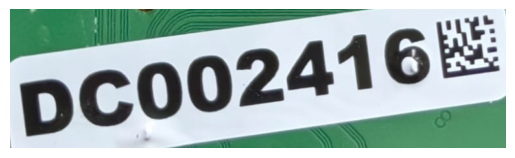

In [58]:
recorte_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(recorte_rgb)
plt.axis("off")
plt.show()

In [61]:
text = pytesseract.image_to_string(recorte_rgb)
print(text)

''

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [209]:
def transformar_imagen(ruta_imagen):
    
    img = cv2.imdecode(np.fromfile(ruta_imagen, dtype=np.uint8), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = gray.shape

    # Definir la región de interés 
    y_inicio = h // 2
    y_fin = int(h * 0.8)
    x_inicio = int(w*0.1)
    x_fin = int(w*0.9)
    roi = gray[y_inicio:y_fin, x_inicio:x_fin]  # toda la anchura, solo la franja deseada

    
    # Suavizar (reduce ruido)
    blur = cv2.GaussianBlur(roi, (5, 5), 0)
    
    # Crear una máscara de lo "blanco"
    _, thresh = cv2.threshold(blur, 140, 200, cv2.THRESH_BINARY)
    contornos, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Toma el contorno más grande y lo pone en la imágen (debo quitarlo si quiero nomás la imágen :p)
    contornos = sorted(contornos, key=cv2.contourArea, reverse=True)
    
    for i, c in enumerate(contornos[0]):
        #color = tuple(np.random.randint(0, 255, 3).tolist())  # color aleatorio
        cv2.drawContours(roi, [c], -1, (0,255,3), 2)

    img_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    
    return [w//2,(y_fin-y_inicio)/2], contornos[0]

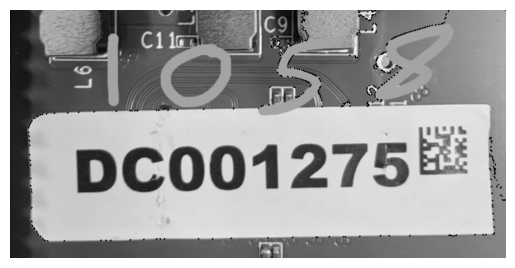

In [226]:
a,b = transformar_imagen(r"C:\Users\Yo pues quién mas xd\Music\Chequeo_daug\6.jpeg")

In [242]:
#Puntos a la mitad de la imágen (Si usamos estos creo que podemos hacer un trabajo considerable :p)
#Quizás si agarramos el valor que esté más cerca de la mitad de y (hacia arriba y hacia abajo) podemos encontrar los puntos bordes 
# Ya sólo sería encontrar dos puntos cercanos (o uno ) para hacer una línea, generar un rectángulo y así :p
valor_min= a[0]-5
valor_max = a[0]+5

filtrados = [
    subarr for subarr in b
    if np.any((subarr[0, :] >= valor_min) & (subarr[0, :] <= valor_max))
]

In [243]:
filtrados

[array([[595, 439]], dtype=int32),
 array([[604, 187]], dtype=int32),
 array([[603, 186]], dtype=int32),
 array([[603, 175]], dtype=int32),
 array([[602, 174]], dtype=int32),
 array([[602, 171]], dtype=int32),
 array([[601, 170]], dtype=int32),
 array([[601, 168]], dtype=int32),
 array([[600, 167]], dtype=int32),
 array([[600, 165]], dtype=int32),
 array([[599, 164]], dtype=int32),
 array([[599, 163]], dtype=int32),
 array([[598, 162]], dtype=int32),
 array([[598, 161]], dtype=int32),
 array([[597, 160]], dtype=int32),
 array([[597, 159]], dtype=int32),
 array([[596, 158]], dtype=int32),
 array([[596, 156]], dtype=int32),
 array([[597, 155]], dtype=int32),
 array([[597, 154]], dtype=int32),
 array([[599, 152]], dtype=int32),
 array([[599, 150]], dtype=int32),
 array([[600, 149]], dtype=int32),
 array([[600, 148]], dtype=int32),
 array([[601, 147]], dtype=int32),
 array([[601, 138]], dtype=int32),
 array([[600, 137]], dtype=int32),
 array([[600, 135]], dtype=int32),
 array([[598, 133]],

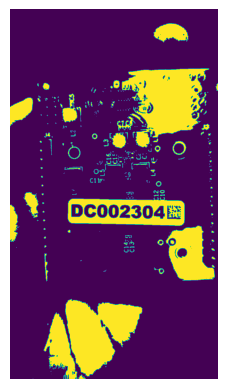

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
transformar_imagen(r"C:\Users\Yo pues quién mas xd\Music\Chequeo_daug\2.jpeg")

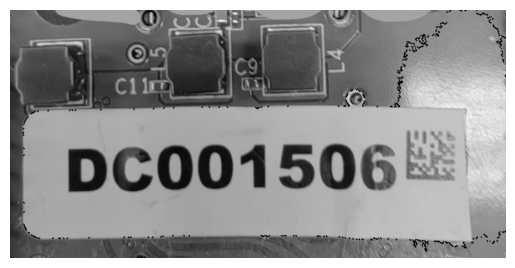

TypeError: Unsupported image object

In [244]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(transformar_imagen(r"C:\Users\Yo pues quién mas xd\Music\Chequeo_daug\3.jpeg"))
print(text)